In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

import datetime as dt

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM, GRU

In [3]:
df = pd.read_csv('TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2/1/2019,20.406668,21.008667,19.920000,20.674667,20.674667,174879000
1,3/1/2019,20.466667,20.626667,19.825333,20.024000,20.024000,104478000
2,4/1/2019,20.400000,21.200001,20.181999,21.179333,21.179333,110911500
3,7/1/2019,21.448000,22.449333,21.183332,22.330667,22.330667,113268000
4,8/1/2019,22.797333,22.934000,21.801332,22.356667,22.356667,105127500


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

/var/folders/l4/8b486cvj0kd783b5k2yvkvg80000gn/T/ipykernel_12934/150256929.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-02-01,20.406668,21.008667,19.920000,20.674667,20.674667,174879000
1,2019-03-01,20.466667,20.626667,19.825333,20.024000,20.024000,104478000
2,2019-04-01,20.400000,21.200001,20.181999,21.179333,21.179333,110911500
3,2019-07-01,21.448000,22.449333,21.183332,22.330667,22.330667,113268000
4,2019-08-01,22.797333,22.934000,21.801332,22.356667,22.356667,105127500


In [5]:
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02196604],
       [0.02033136],
       [0.02323392],
       ...,
       [0.48695938],
       [0.49082837],
       [0.46585592]])

In [7]:
training_data_len = int(np.ceil( len(dataset) * .85 ))

train_data = scaled_data[0:training_data_len, :]
test_data = scaled_data[training_data_len - 60:, :]

training_data_len

1034

In [8]:
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

891
223


In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

model = tf.keras.Sequential()

# Creating the Neural Network model here...
# CNN layers
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))
# model.add(Dense(5, kernel_regularizer=L2(0.01)))

# LSTM layers
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(Dropout(0.5))

#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

In [10]:
history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=40,batch_size=40, verbose=1, shuffle =True)

Epoch 1/40
23/23 [==============================] - 4s 39ms/step - loss: 0.3326 - mse: 0.3326 - mae: 0.4008 - val_loss: 0.1404 - val_mse: 0.1404 - val_mae: 0.2708
Epoch 2/40
23/23 [==============================] - 0s 11ms/step - loss: 0.1531 - mse: 0.1531 - mae: 0.2676 - val_loss: 0.1332 - val_mse: 0.1332 - val_mae: 0.2416
Epoch 3/40
23/23 [==============================] - 0s 11ms/step - loss: 0.1077 - mse: 0.1077 - mae: 0.2179 - val_loss: 0.0982 - val_mse: 0.0982 - val_mae: 0.2072
Epoch 4/40
23/23 [==============================] - 0s 12ms/step - loss: 0.0933 - mse: 0.0933 - mae: 0.2004 - val_loss: 0.0825 - val_mse: 0.0825 - val_mae: 0.1890
Epoch 5/40
23/23 [==============================] - 0s 12ms/step - loss: 0.0802 - mse: 0.0802 - mae: 0.1841 - val_loss: 0.0704 - val_mse: 0.0704 - val_mae: 0.1695
Epoch 6/40
23/23 [==============================] - 0s 14ms/step - loss: 0.0806 - mse: 0.0806 - mae: 0.1839 - val_loss: 0.0663 - val_mse: 0.0663 - val_mae: 0.1727
Epoch 7/40
23/23 [====

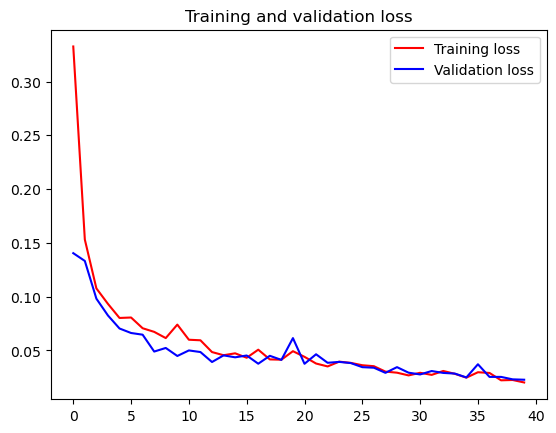

<Figure size 640x480 with 0 Axes>

In [11]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [12]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.950756
R2 Score: 0.950756
Max Error: 0.557602


In [13]:
predictions = model.predict(test_X)
predictions = scaler.inverse_transform(predictions)


7/7 [==============================] - 0s 4ms/step


7/7 [==============================] - 0s 3ms/step
0.15106094026132508


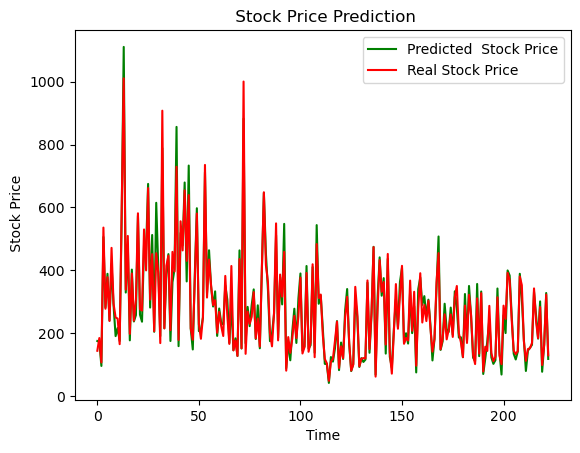

In [14]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)

rmse = np.sqrt(np.mean(((predicted - test_label) ** 2)))
print(rmse)

for j in range(len_t , len_t + len(test_X)):
    temp = df.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()